In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#calculation vs simulation
# Roll a six-sided die 20 times. What's P(at least one 6)?
1 - (5/6) ** 20

0.9739159466954111

In [3]:
rolls = np.arange(1, 51, 1)
at_least_one = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
at_least_one.set_format(1, PercentFormatter(3))

Rolls,Chance of at least one 6
1,16.667%
2,30.556%
3,42.130%
4,51.775%
5,59.812%
6,66.510%
7,72.092%
8,76.743%
9,80.619%
10,83.849%


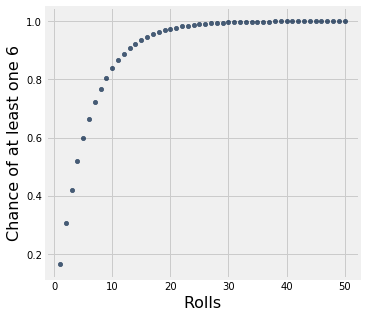

In [4]:
#plotting chance of probability of at least 1 6
at_least_one.scatter('Rolls')

In [5]:
at_least_one.where('Rolls', 20)

Rolls,Chance of at least one 6
20,97.392%


In [6]:
#now, let's do some simulation
#How many of the following return a random number from 1 to 6 (inclusive), with each number equally likely?

#np.random.choice(np.arange(6))
#np.random.choice(np.arange(6)+1)
#np.random.choice(np.arange(1,6+1))
#np.random.choice(np.arange(1,3+1)) + np.random.choice(np.arange(1,3+1))

rolls = np.random.choice(np.arange(1,6+1), 20)
rolls

array([3, 4, 2, 2, 3, 1, 2, 6, 2, 1, 1, 4, 6, 6, 5, 2, 1, 5, 6, 5])

In [7]:
sum(rolls==6)>0

True

In [8]:
# Simulate that experiment many times

trials = 10000
successes = 0  # success means at least one 6

for i in np.arange(trials):
    rolls = np.random.choice(np.arange(1,6+1), 20)
    if sum(rolls==6) > 0:
        successes = successes + 1

successes/trials

0.97

In [10]:
#THIS BRINGS US TO SAMPLING!
top = Table.read_table('top_movies.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
6,Star Wars: Episode I - The Phantom Menace,Fox,474544677,785715000,1999
7,Star Wars,Fox,460998007,1549640500,1977
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012


In [11]:
#deterministic sampling

top.take([3, 5, 7])

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,Jurassic World,Universal,652270625,687728000,2015
5,The Dark Knight,Warner Bros.,534858444,647761600,2008
7,Star Wars,Fox,460998007,1549640500,1977


In [12]:
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
22,Harry Potter and the Deathly Hallows Part 2,Warner Bros.,381011219,417512200,2011
43,Harry Potter and the Sorcerer's Stone,Warner Bros.,317575550,486442900,2001
44,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,384231200,2008
54,Harry Potter and the Half-Blood Prince,Warner Bros.,301959197,352098800,2009
59,Harry Potter and the Order of the Phoenix,Warner Bros.,292004738,369250200,2007
60,"The Chronicles of Narnia: The Lion, the Witch and the Wa ...",Buena Vista (Disney),291710957,393033100,2005
62,Harry Potter and the Goblet of Fire,Warner Bros.,290013036,393024800,2005
69,Harry Potter and the Chamber of Secrets,Warner Bros.,261988482,390768100,2002
76,Harry Potter and the Prisoner of Azkaban,Warner Bros.,249541069,349598600,2004
91,Beauty and the Beast,Buena Vista (Disney),218967620,394664300,1991


In [13]:
#probabilistic, random sampling
start = np.random.choice(np.arange(10))
top.take(np.arange(start, start+5))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,The Dark Knight Rises,Warner Bros.,448139099,500961700,2012
10,Shrek 2,Dreamworks,441226247,618143100,2004
11,E.T.: The Extra-Terrestrial,Universal,435110554,1234132700,1982
12,The Hunger Games: Catching Fire,Lionsgate,424668047,444697400,2013
13,Pirates of the Caribbean: Dead Man's Chest,Buena Vista (Disney),423315812,562266800,2006


In [14]:
indices = np.arange(1, top.num_rows+1)
indices

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [15]:
random_indices = np.random.choice(indices, 5)
random_indices

array([105,   8, 194, 185,  39])

In [16]:
top.take(random_indices)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
105,Dances with Wolves,Orion,184208848,380183900,1990
8,Avengers: Age of Ultron,Buena Vista (Disney),459005868,465684200,2015
194,The Best Years of Our Lives,RKO,23650000,478500000,1946
185,West Side Story,MGM,43656822,486941500,1961
39,Forrest Gump,Paramount,330252182,683929300,1994


In [17]:
top.sample(1)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
155,Butch Cassidy and the Sundance Kid,Fox,102308889,613853300,1969


In [18]:
top.take(np.arange(5)).sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
2,Titanic,Paramount,658672302,1178627900,1997
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
3,Jurassic World,Universal,652270625,687728000,2015


In [19]:
top.take(np.arange(5)).sample(5, with_replacement=True)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
1,Avatar,Fox,760507625,846120800,2009
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
2,Titanic,Paramount,658672302,1178627900,1997
